<center><img src="./imgs/scicrop" width="150" height="100" align="center"/></center>

# **Processo seletivo para Estágio em Data Science - SciCrop 2020**

# Análise dos dados

Este notebook contém a análise dos dados fornecidos no problema proposto pela SciCrop em sua etapa  de avaliação técnica.  

Os dados são separados em dois arquivos: [`Safra_2018-2019.csv`](Safra_2018-2019.csv) (contendo os dados referentes aos anos de 2018 e 2019) e [`Safra_2020.csv`](Safra_2020.csv) (dados de 2020). Em cada um deles é a sequinte relação de colunas (*: presente apenas nos dados referentes aos anos de 2018 e 2019):

| **Variável** | **Descrição** |
| - | - |
| Identificador_Agricultor | IDENTIFICADOR DO CLIENTE |
| Estimativa_de_Insetos | Estimativa de insetos por $m^2$ |
| Tipo_de_Cultivo | Classificação do tipo de cultivo (0,1) |
| Tipo_de_Solo | Classificação do tipo de solo (0,1) |
| Categoria_Pesticida | Informação do uso de pesticidas (1- Nunca Usou, 2-Já Usou, 3-Esta usando) |
| Doses_Semana | Número de doses por semana |
| Semanas_Utilizando | Número de semanas Utilizada |
| Semanas_Sem_Uso | Número de semanas sem utilizar |
| Temporada | Temporada Climática (1,2,3) |
| dano_na_plantacao* | Variável de Predição - Dano no Cultivo (0=Sem Danos, 1=Danos causados por outros motivos, 2=Danos gerados pelos pesticidas) |


## **Índice** <a class="anchor" id="index"></a>
- [Importação e análise dos dados](#data-analysis)
- [Análise de correlação dos dados - numérico](#data-analysis__corr)
- [Teste de novos atributos](#data-analysis__test)
- [Conclusões da análise](#data-analysis__concl)

## **Importação e análise dos dados** <a class="anchor" id="data-analysis"></a>

[Voltar para o índice](#index)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [1]:
import autoreload
%load_ext autoreload
%autoreload 2
from analysis import *

In [3]:
data = pd.read_csv('Safra_2018-2019.csv', index_col = 0)
data.head()

Identificador_Agricultor  Estimativa_de_Insetos  Tipo_de_Cultivo  \
0               SCROP00001                    188                1   
1               SCROP00002                    209                1   
2               SCROP00003                    257                1   
3               SCROP00004                    257                1   
4               SCROP00005                    342                1   

   Tipo_de_Solo  Categoria_Pesticida  Doses_Semana  Semanas_Utilizando  \
0             0                    1             0                 0.0   
1             0                    1             0                 0.0   
2             0                    1             0                 0.0   
3             1                    1             0                 0.0   
4             0                    1             0                 0.0   

   Semanas_Sem_Uso  Temporada  dano_na_plantacao  
0                0          1                  0  
1                0          2                  1  
2                0          2                  1  
3                0          2                  1  
4                0          2                  1

In [4]:
data.shape

(80000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Identificador_Agricultor  80000 non-null  object 
 1   Estimativa_de_Insetos     80000 non-null  int64  
 2   Tipo_de_Cultivo           80000 non-null  int64  
 3   Tipo_de_Solo              80000 non-null  int64  
 4   Categoria_Pesticida       80000 non-null  int64  
 5   Doses_Semana              80000 non-null  int64  
 6   Semanas_Utilizando        71945 non-null  float64
 7   Semanas_Sem_Uso           80000 non-null  int64  
 8   Temporada                 80000 non-null  int64  
 9   dano_na_plantacao         80000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.7+ MB


In [6]:
data.describe()

Estimativa_de_Insetos  Tipo_de_Cultivo  Tipo_de_Solo  \
count           80000.000000     80000.000000  80000.000000   
mean             1400.020875         0.283338      0.455550   
std               849.792471         0.450622      0.498023   
min               150.000000         0.000000      0.000000   
25%               731.000000         0.000000      0.000000   
50%              1212.000000         0.000000      0.000000   
75%              1898.000000         1.000000      1.000000   
max              4097.000000         1.000000      1.000000   

       Categoria_Pesticida  Doses_Semana  Semanas_Utilizando  Semanas_Sem_Uso  \
count         80000.000000  80000.000000        71945.000000     80000.000000   
mean              2.267587     25.846750           28.664480         9.549088   
std               0.463748     15.557246           12.424751         9.905547   
min               1.000000      0.000000            0.000000         0.000000   
25%               2.000000     15.000000           20.000000         0.000000   
50%               2.000000     20.000000           28.000000         7.000000   
75%               3.000000     40.000000           37.000000        16.000000   
max               3.000000     95.000000           67.000000        50.000000   

          Temporada  dano_na_plantacao  
count  80000.000000       80000.000000  
mean       1.897575           0.192312  
std        0.702079           0.455912  
min        1.000000           0.000000  
25%        1.000000           0.000000  
50%        2.000000           0.000000  
75%        2.000000           0.000000  
max        3.000000           2.000000

Maior detalhe pode ser observado ao utilizar da função `data_investigation`, escrita no módulo [analysis.py](analysis.py), a qual mostra a quantidade de instâncias únicas e o gráfico de dispersão das instâncias que possuem valores nulos.

Number of instances : 80000
Number of variables : 10
--------------------
Attributes, data type and ratio of unique instances por total non-null:
	 - Identificador_Agricultor, object, 80000/80000
	 - Estimativa_de_Insetos, int64, 71/80000
	 - Tipo_de_Cultivo, int64, 2/80000
	 - Tipo_de_Solo, int64, 2/80000
	 - Categoria_Pesticida, int64, 3/80000
	 - Doses_Semana, int64, 20/80000
	 - Semanas_Utilizando, float64, 64/71945
	 - Semanas_Sem_Uso, int64, 51/80000
	 - Temporada, int64, 3/80000
	 - dano_na_plantacao, int64, 3/80000
--------------------
Attributes that have missing values: 
Semanas_Utilizando    8055
dtype: int64
--------------------
Pictorial representation of missing values:


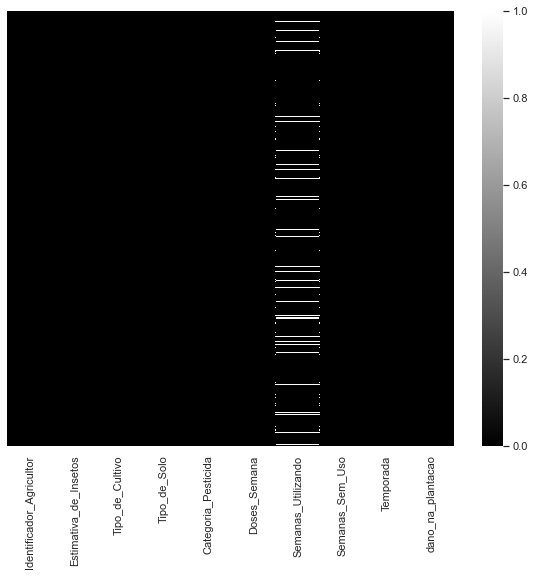

In [7]:
data_investigation(data)

Number of instances : 8858
Number of variables : 9
--------------------
Attributes, data type and ratio of unique instances por total non-null:
	 - Identificador_Agricultor, object, 8858/8858
	 - Estimativa_de_Insetos, int64, 71/8858
	 - Tipo_de_Cultivo, int64, 2/8858
	 - Tipo_de_Solo, int64, 2/8858
	 - Categoria_Pesticida, int64, 3/8858
	 - Doses_Semana, int64, 20/8858
	 - Semanas_Utilizando, float64, 62/7913
	 - Semanas_Sem_Uso, int64, 50/8858
	 - Temporada, int64, 3/8858
--------------------
Attributes that have missing values: 
Semanas_Utilizando    945
dtype: int64
--------------------
Pictorial representation of missing values:


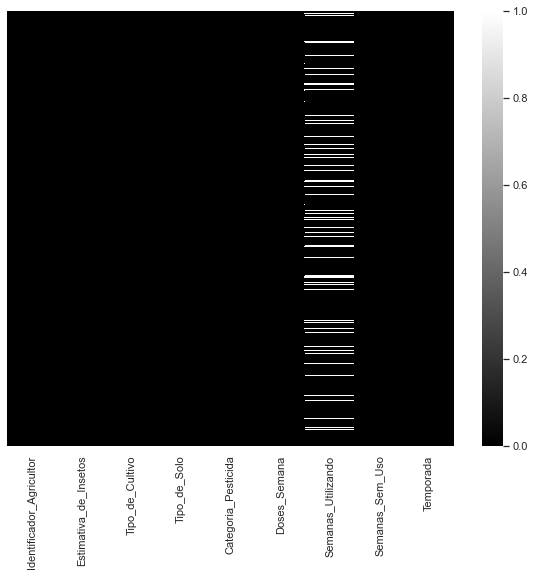

In [94]:
pred = pd.read_csv('Safra_2020.csv', index_col = 0)
data_investigation(pred)

Das informações fornecidas no problema e do gráfico acima, é possível concluir que os atributos *'Tipo_de_Cultivo', 'Tipo_de_Solo', 'Categoria_Pesticida', 'Temporada'* são categóricos, enquanto *'Estimativa_de_Insetos', 'Doses_Semana', 'Semanas_Utilizando', 'Semanas_Sem_Uso'* são numéricas. Ainda, o atributo *'Semanas_Utilizando'* possue um total de $8055$ instâncias nulas dentro do arquivo de treinamento e $945$ instâncias nulas dentro do arquivo de predição, o que deverá ser considerado no momento do treinamento dos modelos.

## **Análise de correlação dos dados** <a class="anchor" id="data-analysis__corr"></a>

[Voltar para o índice](#index)

Os dados podem ser analisados frente à correlação que possuem com o atributo *'dano_na_plantacao'*, o que é que se deseja descobrir na base de 2020.

In [8]:
corr = data.corr()
corr.sort_values(by = 'dano_na_plantacao')['dano_na_plantacao']

Semanas_Sem_Uso         -0.133115
Doses_Semana            -0.030476
Tipo_de_Solo            -0.021176
Tipo_de_Cultivo         -0.017228
Temporada               -0.002233
Categoria_Pesticida      0.172943
Estimativa_de_Insetos    0.203290
Semanas_Utilizando       0.233523
dano_na_plantacao        1.000000
Name: dano_na_plantacao, dtype: float64

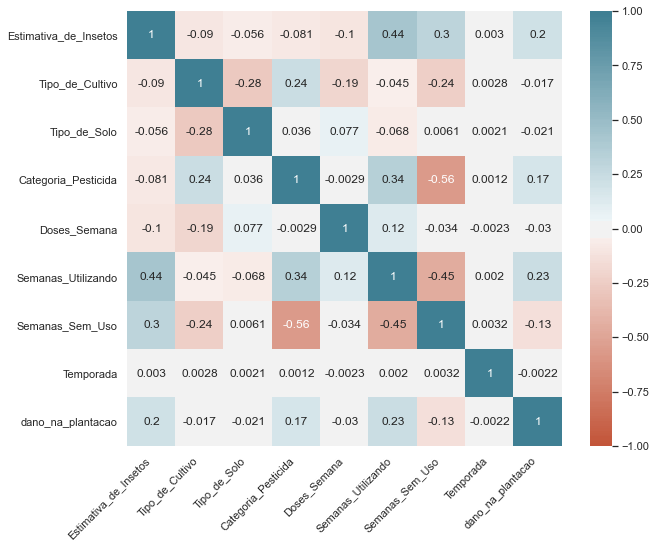

In [9]:
corr_matrix_plot(corr)

Do resultado acima, os atributos nativos que possuem maior correlação com *'dano_na_plantacao'* são *'Semanas_Sem_Uso', 'Categoria_Pesticida', 'Estimativa_de_Inseto' e 'Semanas_Utilizando'*, sendo dentre elas apenas *'Categoria_Pesticida'* uma variável categórica.

O coeficiente de correlação calculado acima se refere ao coeficiente $r$ de Pearson. Neste caso, deseja-se averiguar a correlação entre um conjunto de atributos (que são tanto numéricos quanto categóricos) com um atributo categórico. Para tal, é mais apropriado:
- Utilizar do coeficiente $V$ de Cramer para estimar a correlação entre os atributos categóricos e *'dano_na_plantacao'*
- Utilizar do coeficiente $\eta$ para estimar a correlação entre os atributos numéricos e *'dano_na_plantacao'*

Os métodos para o cálculo de cada coeficiente de correlação estão definidos no módulo [analysis.py](analysis.py).

In [10]:
cat_feats = ['Tipo_de_Cultivo', 'Tipo_de_Solo', 'Categoria_Pesticida', 'Temporada']
cat_feats_2 = ['Tipo_de_Cultivo', 'Tipo_de_Solo', 'Categoria_Pesticida', 'Temporada', 'dano_na_plantacao']
num_feats = ['Estimativa_de_Insetos', 'Doses_Semana', 'Semanas_Utilizando', 'Semanas_Sem_Uso']

**Coeficiente de correlação $V$ de Cramer entre atributos categóricos e *'dano_na_plantacao'***:

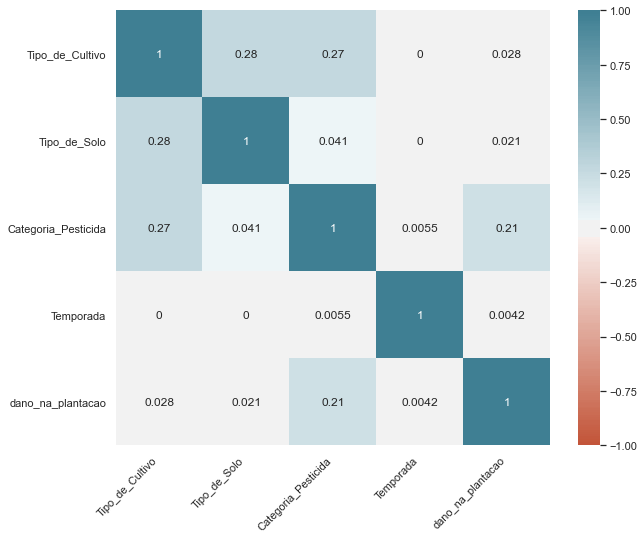

In [11]:
corr_m_cat = corr_matrix_v(data, cat_feats_2)
corr_matrix_plot(corr_m_cat)

**Coeficiente $\eta$ de correlação entre atributos numéricos e *'dano_na_plantacao'***:

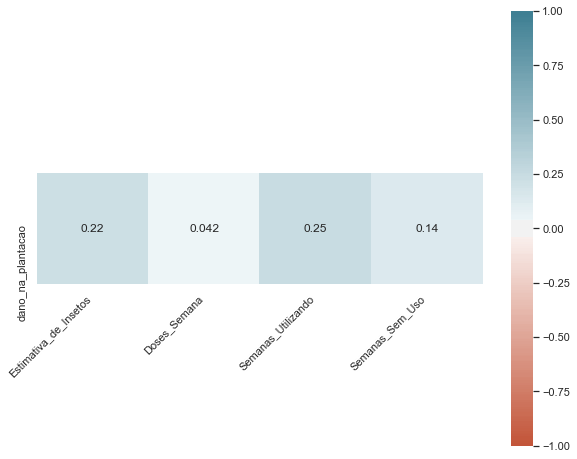

In [12]:
corr_m_num = corr_matrix_eta(data, num_feats, 'dano_na_plantacao')
corr_matrix_plot(corr_m_num)

Com isso, confirma-se que os atributos que possuem maior correlação com *'dano_na_plantacao'* são de fato *'Semanas_Sem_Uso', 'Categoria_Pesticida', 'Estimativa_de_Inseto' e 'Semanas_Utilizando'*. É possível visualizar o comportamento desta correlação através de histogramas (atributos categóricos) e gráficos de dispersão (atributos numéricos).

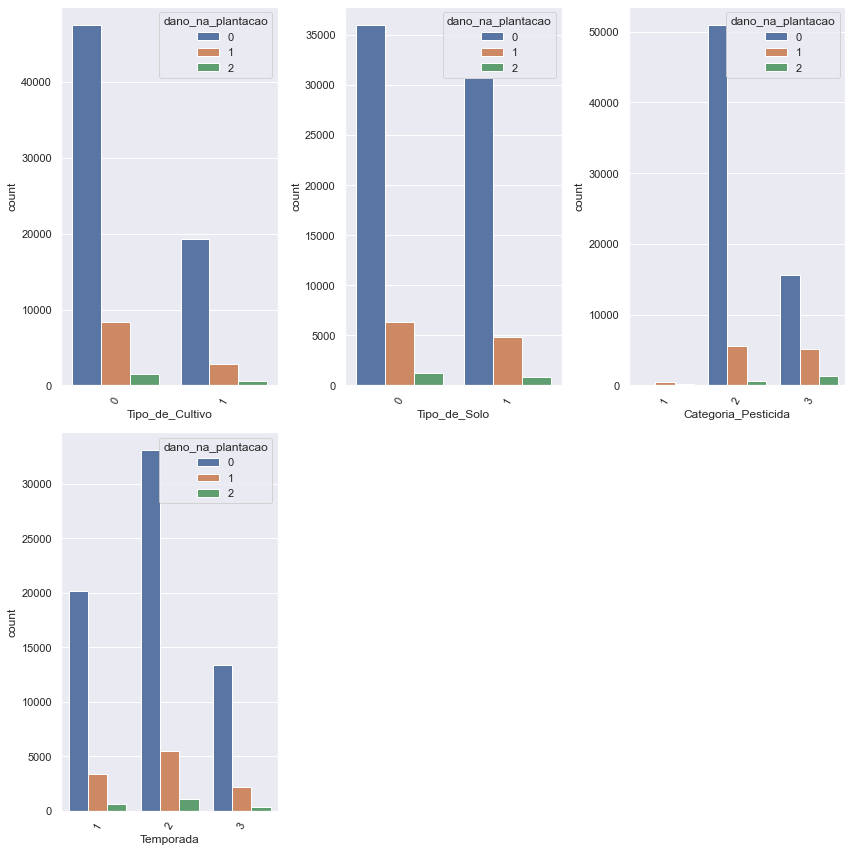

In [13]:
# Dados gerais
hist_stack_plot(data, cat_feats, stack_target = 'dano_na_plantacao')

Os histogramas acima revelam que pouca mudança ocorre no perfil de distribuição entre os possíveis valores de *'dano_na_plantacao'* frente às diferentes classes dentro de cada atributo categórico. De fato, a mudança mais expressiva é no histograma referente ao atributo *'Categoria_Pesticida'*, onde ocorre uma diminuição relativa de plantios sem danos bastante expressiva quando comparados os pesticidas 2 e 3. O mesmo acontece ao comparar os pesticidas 1 e 2, porém, é possível averiguar que a quantidade de instâncias referentes ao pesticida 1 é apenas extremamente baixa, equivalente à apenas $0.95\%$: 

In [14]:
round((data[data['Categoria_Pesticida']==1].shape[0]/data.shape[0])*100, 2)

0.95

Também é possível verificar que a distribuição de dados que possuem a instância $0$ para *'dano_na_plantacao'* é muito maior do que para $1$ e $2$, sendo equivalente à $83.39\%$ de todos os dados:

In [15]:
round((data[data['dano_na_plantacao']==0].shape[0]/data.shape[0])*100, 2)

83.39

É possível separar os dados em dois grupos distintos:
- **Grupo 1**: focado em distinguir os plantios que ocorrem e não ocorrem danos, irrespectivo do tipo de dano
- **Grupo 2**: focado nos plantios que sofrem danos, procurando averigurar quais diferenças existem entre os atributos frente aos dois diferentes tipos de danos

In [16]:
grupo1 = data[(data.dano_na_plantacao == 2) | (data.dano_na_plantacao == 1) | (data.dano_na_plantacao == 0)]
grupo1.loc[(data.dano_na_plantacao == 2), 'dano_na_plantacao'] = 1
grupo1['dano_na_plantacao'].unique()

array([0, 1])

In [17]:
grupo2 = data[(data.dano_na_plantacao == 2) | (data.dano_na_plantacao == 1)]
grupo2['dano_na_plantacao'].unique()

array([1, 2])

Com esses grupos formados, é possível averiguar a matrix de correlação $V$ para os dados categóricos:

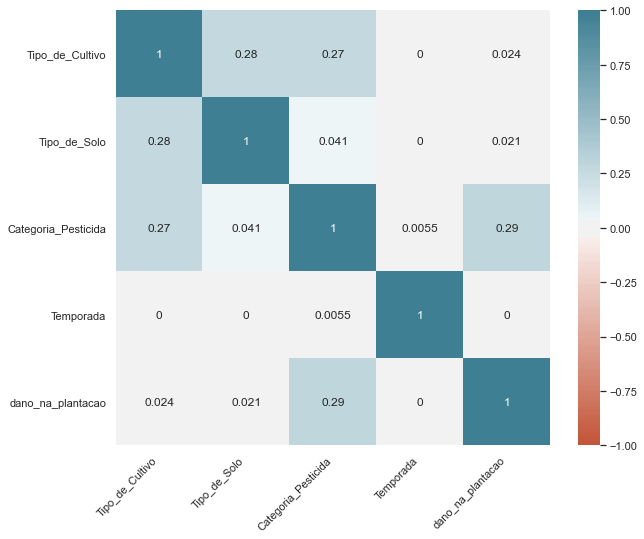

In [18]:
# Grupo 1
corr_m_g1 = corr_matrix_v(grupo1, cat_feats_2)
corr_matrix_plot(corr_m_g1)

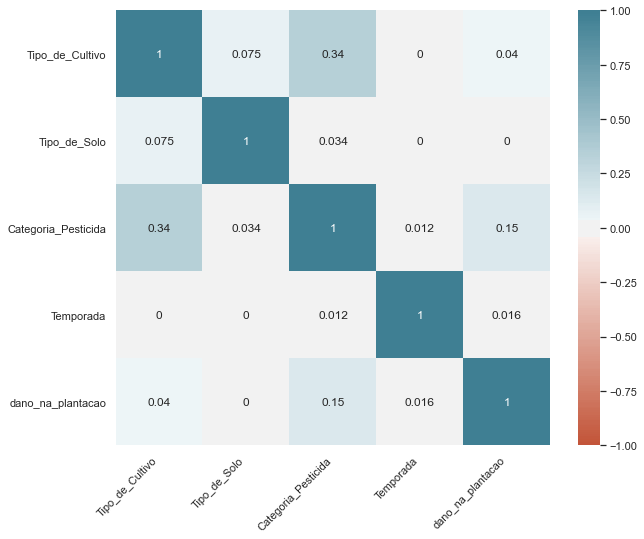

In [19]:
# Grupo 2
corr_m_g2 = corr_matrix_v(grupo2, cat_feats_2)
corr_matrix_plot(corr_m_g2)

In [20]:
pd.DataFrame([corr_m_cat.loc['dano_na_plantacao'],
              corr_m_g1.loc['dano_na_plantacao'],
              corr_m_g2.loc['dano_na_plantacao']],
            index = ['Dados gerais', 'Grupo 1', 'Grupo 2']).round(2).style.set_caption(
    'Correlação V entre as variáveis categóricas e dano_na_plantacao para os diferentes grupos')

Nota-se pela tabela acima que o atributo *'Categoria_Pesticida'* aumenta o nível de correlação quando considerado apenas a distinção feita pelo **grupo 1**. Para distinguir entre os tipos de dano (**grupo 2**), o *'Tipo_de_Cultivo'* apresenta um aumento na influência, porém não é muito significativa.

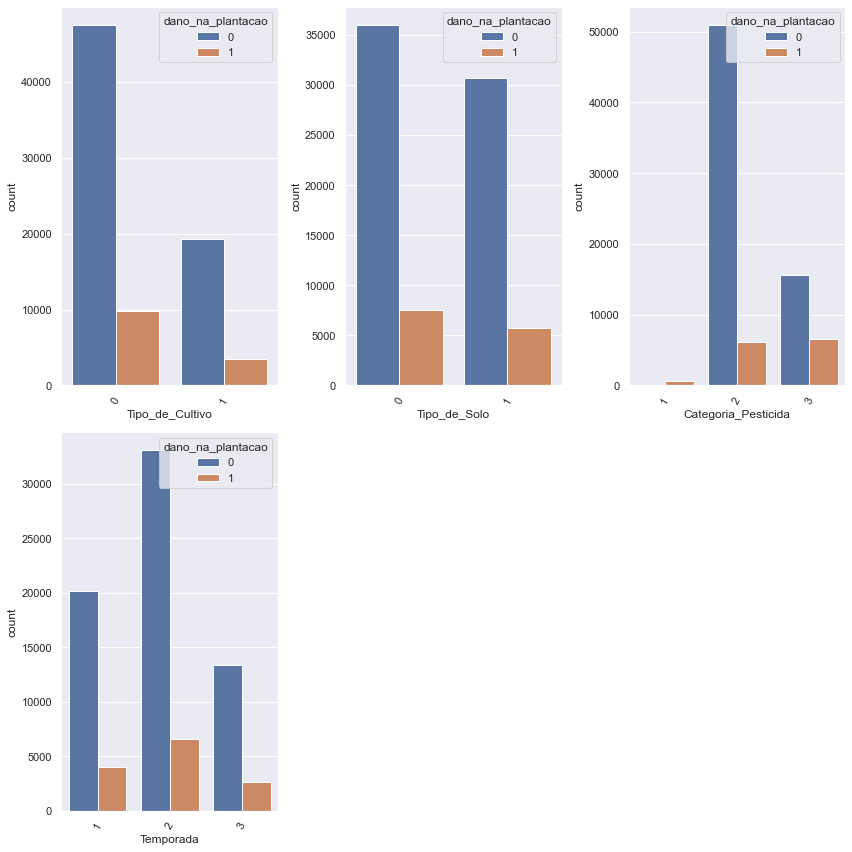

In [21]:
# Grupo 1
hist_stack_plot(grupo1, cat_feats, stack_target = 'dano_na_plantacao')

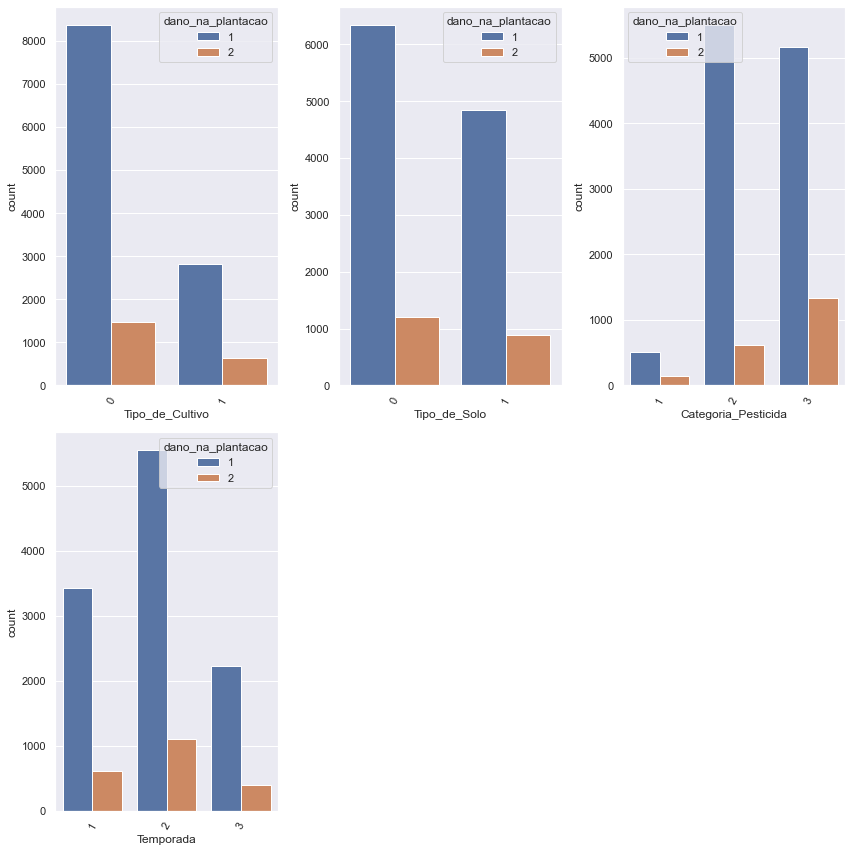

In [22]:
# Grupo 2
hist_stack_plot(grupo2, cat_feats, stack_target = 'dano_na_plantacao')

Dos gráficos acima, é possível concluir que:
- O perfil da variação dos histogramas para cada classe dentro dos atributos categóricos não apresentam variação expressiva, mesmo quando são feitas as abstrações propostas pelos dois grupos
- A unica variação expressiva que ocorre é para a variável categórica *'Categoria_Pesticida'*. Aparentemente, a pouca quantidade de pessoas que nunca utilizaram os pesticidas apresentam uma taxa de mortalidade expressivamente maior do que os que já usaram ou que ainda usam. Ainda, a proporção de danos (*'dano_na_plantacao'* igual a 1 ou 2) por não danos (*'dano_na_plantacao'* igual a 0) causados ao plantio aumenta significativamente quando o uso de pesticidas continua a ser utilizada (*'Categoria_Pesticida'* igual a 3) em comparação àqueles que apenas já fizeram uso (*'Categoria_Pesticida'* igual a 2)

A análise da distribuição de danos causados aos plantios em relação aos atributos numéricos pode ser feita através de gráficos de dispersão. Para tal, a função `scatter_plot_num` é utilizada. Ainda, é possível analisar o comportamento do valor médio das variáveis no eixo $\hat{y}$ em função do eixo $\hat{x}$ através da função `rel_plot_num`, o qual apresenta também a região equivalente ao intervalo de confiança de $95\%$.

Aqui também é possível de se realizar a análise para três casos distintos:
- O primeiro sobre todo o conjunto de dados, considerando a distinção entre danos não causados, danos causados por outros motivos e danos causados por pesticidas
- O segundo sobre o **grupo 1**, ou seja, considerando apenas a distinção de danos causados e não causados
- O terceiro sobre o **grupo 2**, ou seja, considerando apenas a distinção sobre os dois possíveis tipos de danos causados

Antes de plotar os gráficos mencionados, é válido analisar a matriz de correlação $\eta$ para os dois diferentes grupos e compará-los com os dados gerais:

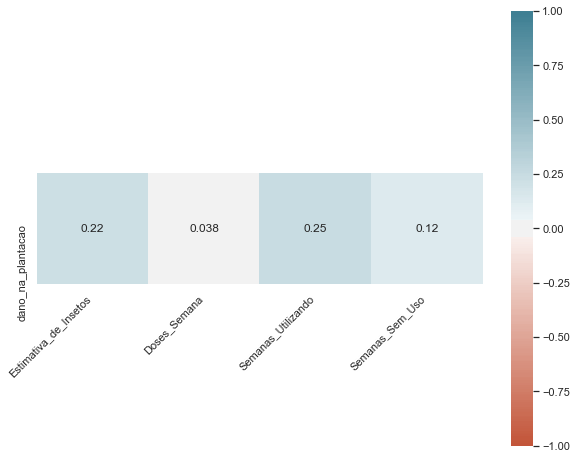

In [23]:
corr_num_g1 = corr_matrix_eta(grupo1, num_feats, 'dano_na_plantacao')
corr_matrix_plot(corr_num_g1)

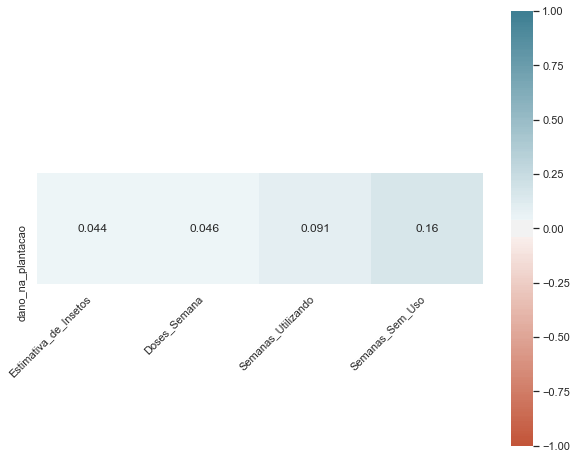

In [24]:
corr_num_g2 = corr_matrix_eta(grupo2, num_feats, 'dano_na_plantacao')
corr_matrix_plot(corr_num_g2)

In [25]:
pd.DataFrame([corr_m_num.loc['dano_na_plantacao'],
              corr_num_g1.loc['dano_na_plantacao'],
              corr_num_g2.loc['dano_na_plantacao']],
            index = ['Dados gerais', 'Grupo 1', 'Grupo 2']).round(2).style.set_caption(
    'Correlação $\eta$ entre as variáveis numéricas e dano_na_plantacao para os diferentes grupos')

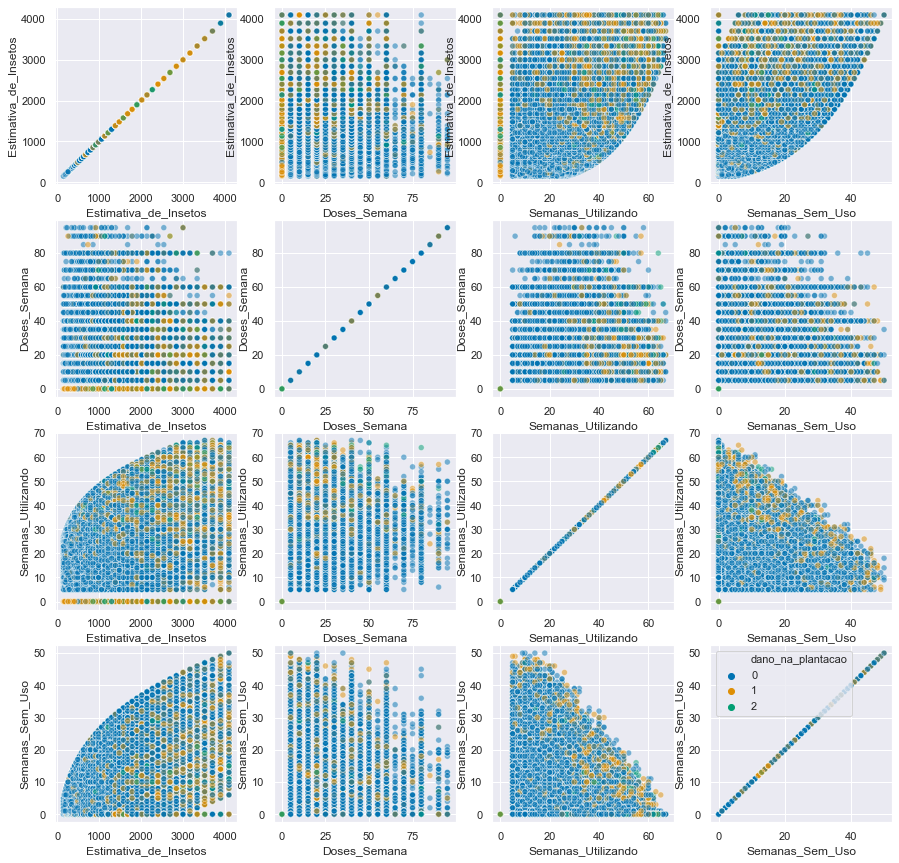

In [26]:
# Dados gerais
scatter_plot_num(data, num_feats, stack_target = 'dano_na_plantacao', alpha = 0.5)

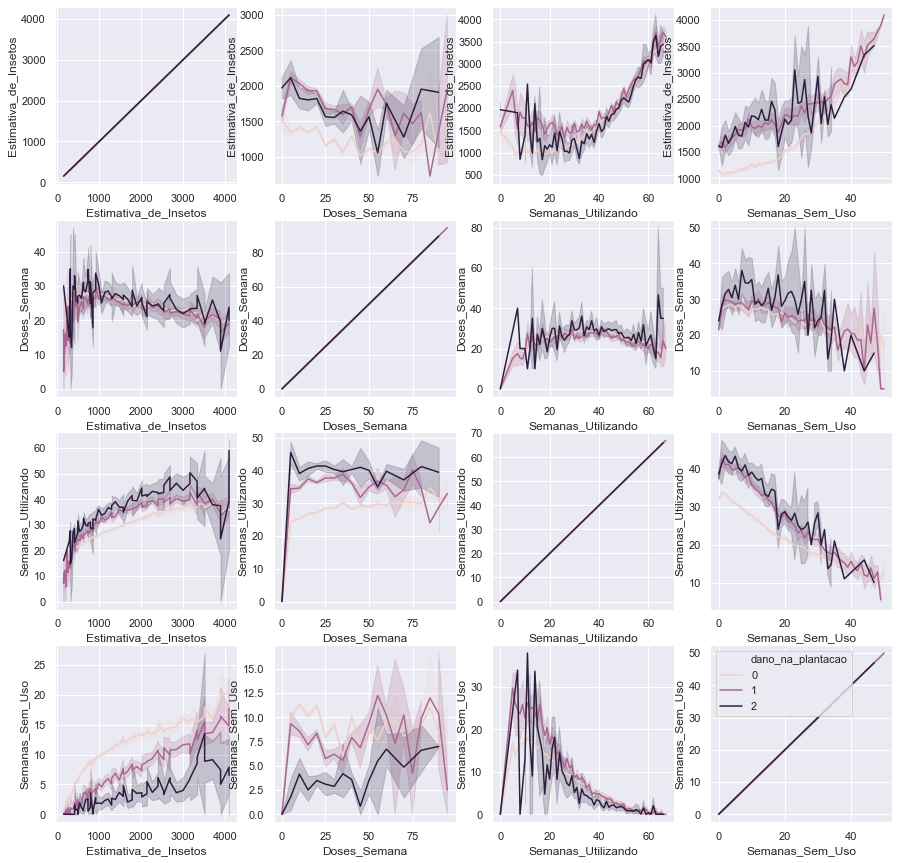

In [27]:
rel_plot_num(data, num_feats, hue = 'dano_na_plantacao')

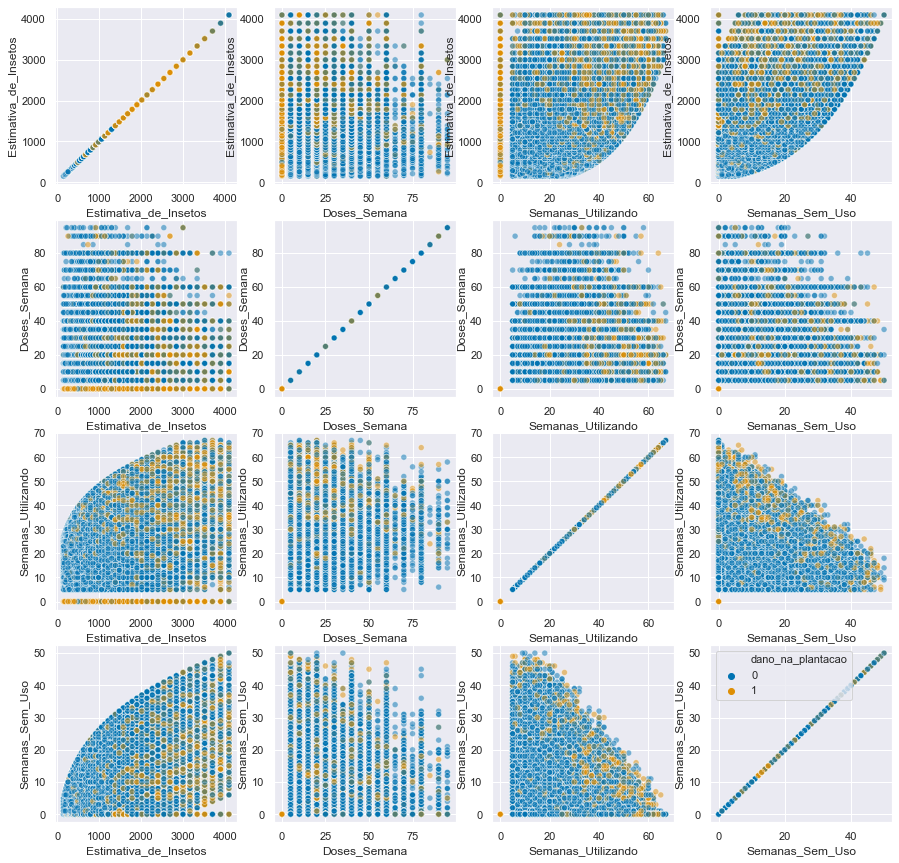

In [28]:
# Grupo 1
scatter_plot_num(grupo1, num_feats, stack_target = 'dano_na_plantacao', alpha = 0.5)

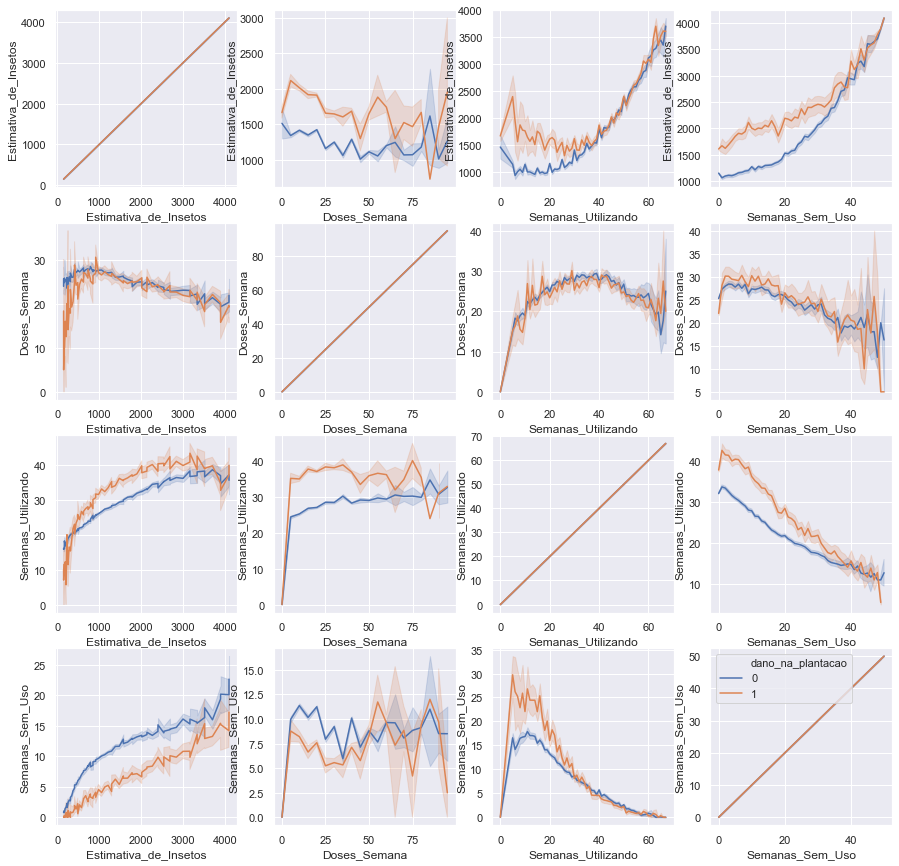

In [29]:
rel_plot_num(grupo1, num_feats, hue = 'dano_na_plantacao')

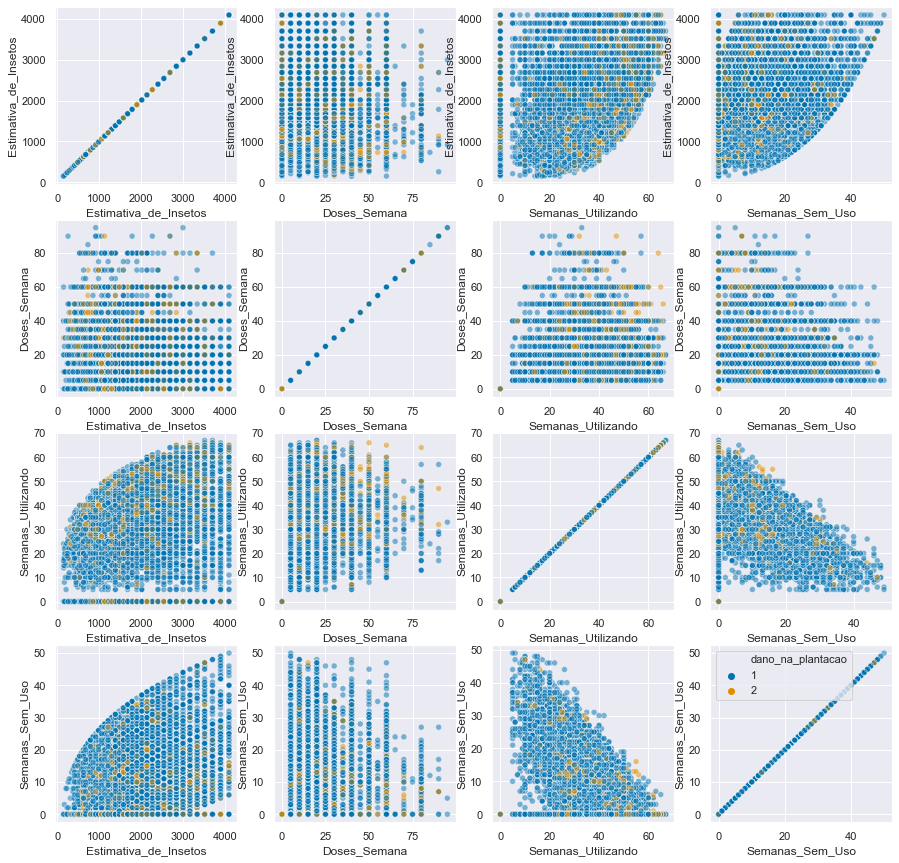

In [30]:
# Grupo 2
scatter_plot_num(grupo2, num_feats, stack_target = 'dano_na_plantacao', alpha = 0.5)

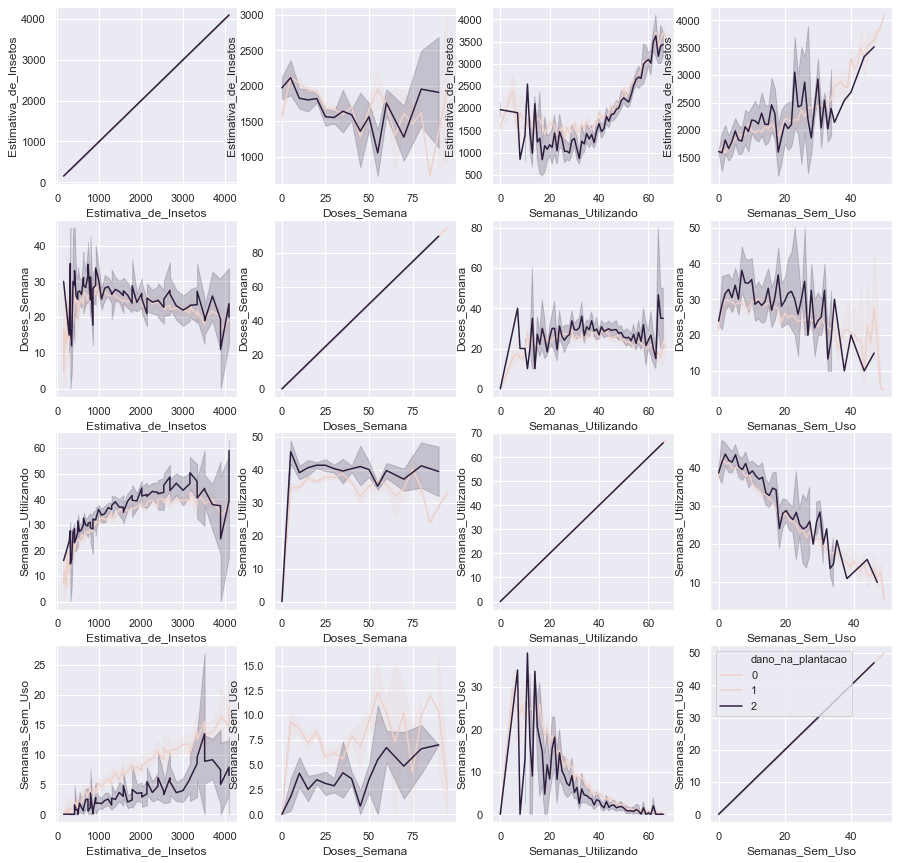

In [31]:
rel_plot_num(grupo2, num_feats, hue = 'dano_na_plantacao')

Dos gráficos acima, é possível concluir que:
- A correlação entre as variáveis observadas pela matrix de correlação $\eta$ são evidentes, principalmente em relação aos atributos *'Estimativa_de_Insetos', 'Semanas_Utilizando' e 'Semanas_Sem_Uso'*. Nestes três atributos, é possível observar que os gráficos relacionais (graficos de linhas) apresentam regiões maiores onde é possível fazer a distinção entre cada classe dentro de *'dano_na_plantacao'*
- É mail fácil realizar a distinção por regiões entre os dados que distinguem apenas se ocorre ou não danos (**grupo 1**) do que os dados apontam para qual tipo de dano que ocorre (**grupo 2**), o que também é apontado pela matrix de correlação $\eta$ apresentada anteriormente
- A estimativa de insetos por $m^2$ apresenta
    - um aumento conserável conforme aumenta-se o número de semanas utilizando,
    - um aumento expressivo conforme aumenta-se o número de semanas utilizando,
    - uma maior tendência de causar danos ao plantio quanto maior for a concentração de insetos. 

## **Testando novos atributos** <a class="anchor" id="data-analysis__test"></a>

[Voltar para o índice](#index)

Da análise feita anteriormente, é possível concluir que os atributos *'Tipo_de_Solo', 'Tipo_de_Cultivo', 'Temporada' e 'Doses_por_Semana'* possuem baixa correlação com a estimativa de danos na plantação. É possível trabalhar em cima deles de forma que se extraia novos atributos que possam apresentar maior correlação. Esta combinação depende bastante do contexto do problema , e da criatividade do cientista de dados. Por questão de tempo e simplicidade, aqui serão testados dois novos atributos:
- A combinação dos atributos categóricos *'Tipo_de_Solo' e 'Tipo_de_Cultivo'* em um novo atributo categórico denominado *'Tipo_de_Solo_Cultivo'*
- A combinação dos atributos numéricos *'Doses_por_Semana' e 'Semanas_Utilizando'* em um novo atributo numérico denominado *'Dose_Total'*

#### *'Tipo_de_Solo_Cultivo'*:

In [86]:
# Grupo 3

grupo3 = data[(data.dano_na_plantacao == 2) | (data.dano_na_plantacao == 1) | (data.dano_na_plantacao == 0)]
grupo3.loc[((data.Tipo_de_Solo == 0) & (data.Tipo_de_Cultivo == 0)), 'Tipo_de_Solo_Cultivo'] = 0
grupo3.loc[((data.Tipo_de_Solo == 0) & (data.Tipo_de_Cultivo == 1)), 'Tipo_de_Solo_Cultivo'] = 1
grupo3.loc[((data.Tipo_de_Solo == 1) & (data.Tipo_de_Cultivo == 0)), 'Tipo_de_Solo_Cultivo'] = 2
grupo3.loc[((data.Tipo_de_Solo == 1) & (data.Tipo_de_Cultivo == 1)), 'Tipo_de_Solo_Cultivo'] = 3

In [87]:
grupo3.head()

Identificador_Agricultor  Estimativa_de_Insetos  Tipo_de_Cultivo  \
0               SCROP00001                    188                1   
1               SCROP00002                    209                1   
2               SCROP00003                    257                1   
3               SCROP00004                    257                1   
4               SCROP00005                    342                1   

   Tipo_de_Solo  Categoria_Pesticida  Doses_Semana  Semanas_Utilizando  \
0             0                    1             0                 0.0   
1             0                    1             0                 0.0   
2             0                    1             0                 0.0   
3             1                    1             0                 0.0   
4             0                    1             0                 0.0   

   Semanas_Sem_Uso  Temporada  dano_na_plantacao  Tipo_de_Solo_Cultivo  
0                0          1                  0                   1.0  
1                0          2                  1                   1.0  
2                0          2                  1                   1.0  
3                0          2                  1                   3.0  
4                0          2                  1                   1.0

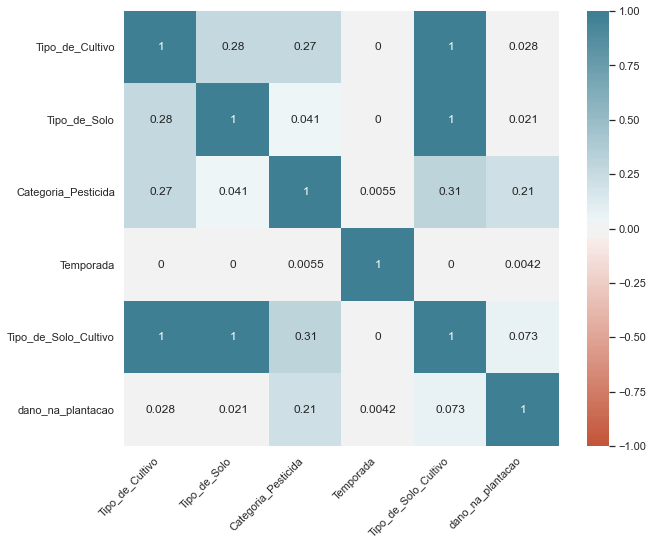

In [89]:
cat_feats_3 = ['Tipo_de_Cultivo', 'Tipo_de_Solo', 'Categoria_Pesticida', 'Temporada', 'Tipo_de_Solo_Cultivo', 'dano_na_plantacao']
corr_m_g3 = corr_matrix_v(grupo3, cat_feats_3)
corr_matrix_plot(corr_m_g3)

É possível averigurar que este novo atributo categórico possue maior correlação com os efeitos de danos do que os dois atributos isolados. Com isso, é possível dropá-los e marter apenas o quando for feito o tratamento do modelo.

#### *'Dose_Total'*:

In [92]:
# grupo 4:
grupo4 = data[(data.dano_na_plantacao == 2) | (data.dano_na_plantacao == 1) | (data.dano_na_plantacao == 0)]
grupo4['Dose_Total'] = data['Doses_Semana']*data['Semanas_Utilizando']

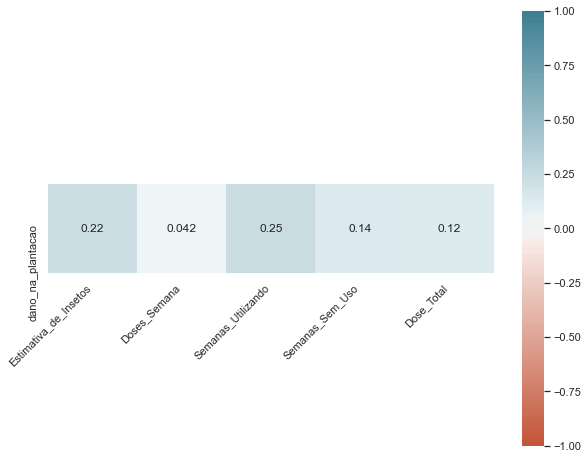

In [93]:
test_feats = ['Estimativa_de_Insetos', 'Doses_Semana', 'Semanas_Utilizando', 'Semanas_Sem_Uso', 'Dose_Total']

corr_num_g4 = corr_matrix_eta(grupo4, test_feats, 'dano_na_plantacao')
corr_matrix_plot(corr_num_g4)

Assim, o novo atributo *'Dose_Total'* possue maior correlação que o atributo *'Doses_Semana'*, de forma que este pode ser então substituido no processo de tratamento do modelo de predição.

## **Conclusões da análise** <a class="anchor" id="data-analysis__concl"></a>

[Voltar para o índice](#index)

A análise dos dados fornecidos aponta que alguns atributos correlacionam melhor com os resultados de danos do que outros. Foram testados novos atributos a partir de combinações, e, com isso, os que são mais adaptados para serem alimentados ao modelo são *'Estimativa_de_Insetos', 'Semanas_Utilizando', 'Semanas_Sem_Uso', 'Dose_Total'* (numéricos), *'Categoria_Pesticida', 'Temporada', 'Tipo_de_Solo_Cultivo' e 'dano_na_plantacao'* (categóricos). 

Como esta análise se trata de um processo prévio, não averiguando a eficiência de cada atributo sobre a capacidade de predição do modelo, diversos métodos serão testados a fim de se decidir quais são os melhores modelos e atributos a serem usados.

A próxima etapa consiste na preparação dos dados para serem testados os modelos. Este processo será descrito no notebook [`preparacao.ipynb`](preparacao.ipynb), enquanto o desenvolvimento do modelo será discutido em [`modelo.ipynb`](modelo.ipynb).